In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2656a78748>,
      dtype=object)

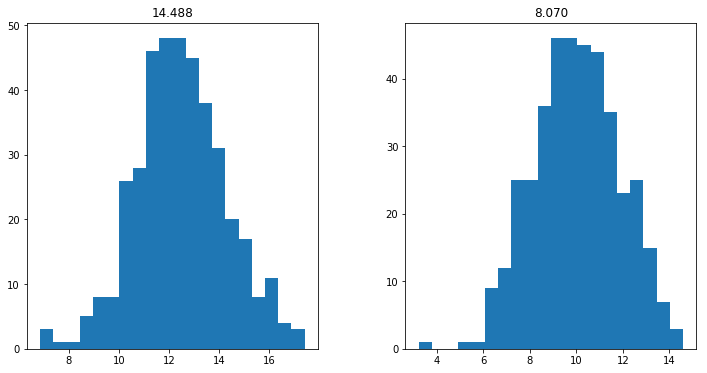

In [37]:
data = pd.read_csv("~/Desktop/mcc20192/mlearning/tareas/tarea2/nb_data/bacterias.csv")
X1 = data.iloc[0:,0]
X2 = data.iloc[0:,1]
B = data.iloc[0:,2]
pd.DataFrame.hist(data.iloc[0:,:-1], grid=False,bins=20,figsize=(12,6))

In [4]:
# Se supone que la distribución de la bacteria sobreviviente es normal con respecto a cada químico
def mve_mu_estimation(col):
    s = 0
    for k in col.index:
        s += col.loc[k]
    return s/len(col)

mu1 = mve_mu_estimation(X1)
mu2 = mve_mu_estimation(X2)

def mve_variance_estimation(col):
    mu = mve_mu_estimation(col)
    s = 0
    for k in col.index:
        s += (col.loc[k]-mu)**2
    return s/len(col)

var1 = mve_variance_estimation(X1)
var2 = mve_variance_estimation(X2)

print(mu1,var1)
print(mu2,var2)

# Para la probabilidad de la clase suponemos una distribución Bernoulli.
def qmve_of_class(cl):
    Nc=0
    for k in B.index:
        if B[k] == cl:
            Nc += 1
    return Nc/len(B)
print(qmve_of_class(1)*399,qmve_of_class(0)*399)

# Calcular la probabilidad puntual (densidad) para una distribución normal
def normal_pd(x, mu, var):
    return (np.exp(-x-mu)**2/(2*var))/(2*np.pi*var)**.5

# concentrations = [qty of X1,qty of X2]
def prob_of_surviving_bacteria(cl,concentrations):
    p = qmve_of_class(cl)
    p *= normal_pd(concentrations[0],mu1,var1)
    p *= normal_pd(concentrations[1],mu2,var2)
    return p    

10.00077192982456 3.3926943915930154
12.478265664160398 3.218059222655635
200.0 199.0


In [5]:
# Construcción del modelo por máxima verosimilitud
def mve_classifier2(concentrations):
    if prob_of_surviving_bacteria(0,concentrations) < prob_of_surviving_bacteria(1,concentrations):
        return 1
    if prob_of_surviving_bacteria(1,concentrations) < prob_of_surviving_bacteria(0,concentrations):
        return 0

print(X1.loc[0],X2.loc[0])
mve_classifier2([8.684,12.804])

8.684 12.804


1

In [7]:
def error_rate():
    errors = 0
    for k in data.index:
        if mve_classifier2([X1.loc[k],X2.loc[k]]) != B[k]:
            errors += 1
    print('Número de errores:', errors)
    print('Porcentaje de errores:',  100*errors/len(B))
    return 0
    
print(error_rate())
# Por clase, la tasa de error para la bacteria 0 es del 100%

Número de errores: 199
Porcentaje de errores: 49.87468671679198
0
